In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from dataloader import load_data, visualize_images
from tensorflow.keras.models import load_model

# Load data and get train_dir
train_generator, test_generator = load_data()

# Obtain train_dir from train_generator
train_dir = train_generator.directory


# Load the baseline model
baseline_model = load_model("baseline_model.h5")

# Load the augmented model
augmented_model = load_model("augmented_model.h5")

2024-04-29 10:55:25.867531: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 10:55:25.867924: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 10:55:25.871508: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 10:55:25.928507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 10:55:26.823247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Found 202 images belonging to 2 classes.
Found 171 images belonging to 2 classes.


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


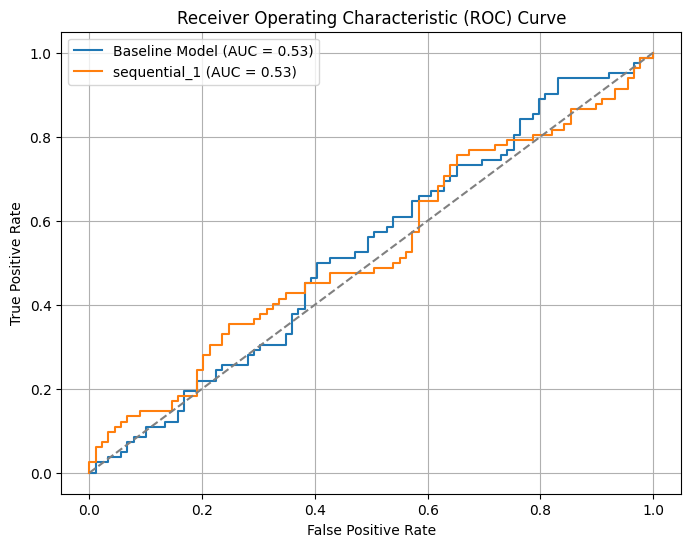

In [3]:
# Evaluate the Models

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, generator):
    y_true = generator.classes
    y_score = model.predict(generator).ravel()
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.name} (AUC = {roc_auc:.2f})')

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plot ROC curve for baseline model
plot_roc_curve(baseline_model, test_generator)

# Plot ROC curve for augmented model
plot_roc_curve(augmented_model, test_generator)

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()